In [7]:
# Import standard libraries
import os
import sys
import json
import random
import warnings
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for working with images
import cv2
from osgeo import gdal
import rasterio
import tifffile

# Torch libraries
import torch
import torchvision

# Output used libraries versions
PYTHON_VERSION = sys.version.split('\n')[0]
print(f"Python        : {PYTHON_VERSION}")
print(f"Numpy         : {np.__version__}")
print(f"Pandas        : {pd.__version__}")
print(f"Rasterio      : {rasterio.__version__}")
print(f"GDal          : {gdal.__version__}")
print(f"tifffile      : {tifffile.__version__}")
print(f"OpenCV        : {cv2.__version__}")
print(f"PyTorch       : {torch.__version__}")
print(f"Torchvision   : {torchvision.__version__}")

# Chech wheather CUDA is available and set up torch device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"Device        : {device}")

Python        : 3.8.5 (default, Jan 27 2021, 15:41:15) 
Numpy         : 1.20.1
Pandas        : 1.2.3
Rasterio      : 1.2.1
GDal          : 3.2.1
tifffile      : 2021.3.17
OpenCV        : 4.5.1
PyTorch       : 1.7.1+cu101
Torchvision   : 0.8.2+cu101
Device        : cuda


In [8]:
# Set seed of random generators
SEED = 42
random.seed(SEED)       # Python seed
np.random.seed(SEED)    # Numpy seed
torch.manual_seed(SEED)        # PyTorch seed
torch.backends.cudnn.benchmark = False # Set cuDNN to deterministically select an algorithm

# Set Seaborn visualizing properties
sns.set()
sns.set_context("paper", font_scale=1.2)

# Set warnings to be ignored
warnings.filterwarnings('ignore')

Light mode palette:
Dark mode palette:


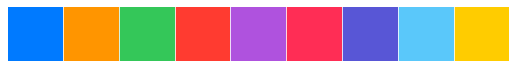

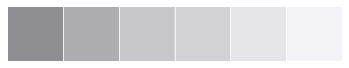

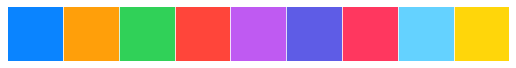

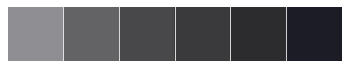

In [9]:
# Set palettes code
# DarkMode code is taken from:
# https://www.kaggle.com/subinium/dark-mode-visualization-apple-version

light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]

gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]

gray_dark_palette = [
    (142, 142, 147),# Gray
    (99, 99, 102),  # Gray (2)
    (72, 72, 74),   # Gray (3)
    (58, 58, 60),   # Gray (4)
    (44, 44, 46),   # Gray (5)
    (28, 28, 39),   # Gray (6)
]


light_palette = np.array(light_palette)/255
dark_palette = np.array(dark_palette)/255
gray_light_palette = np.array(gray_light_palette)/255
gray_dark_palette = np.array(gray_dark_palette)/255

print('Light mode palette:')
sns.palplot(light_palette)
sns.palplot(gray_light_palette)

print('Dark mode palette:')
sns.palplot(dark_palette)
sns.palplot(gray_dark_palette)

In [11]:
PATH = os.getcwd()
DATA_DIR = os.path.join(PATH, "hubmap-kidney-segmentation")
TRAIN_CSV_PATH = os.path.join(DATA_DIR, "train.csv")

In [12]:
train_df = pd.read_csv(TRAIN_CSV_PATH)
train_df.head()

,id,encoding
0,2f6ecfcdf,296084587 4 296115835 6 296115859 14 296147109...
1,8242609fa,96909968 56 96941265 60 96972563 64 97003861 6...
2,aaa6a05cc,30989109 59 31007591 64 31026074 68 31044556 7...
3,cb2d976f4,78144363 5 78179297 15 78214231 25 78249165 35...
4,b9a3865fc,61271840 4 61303134 13 61334428 22 61365722 30...
